# Student Performance in Exams

In order to take actions and neccessary measures to ensure academic success, it is important to understand the influence of various factors like economic, personal and social on student's performance. 

In this study, we will use a dataset from [kaggle](https://www.kaggle.com/spscientist/student-performance-in-exams/data), on marks secured by high school students from the United States.

#### Aim

- To perform hypothesis test on inferences using the data.

Let’s start with an activity studying the effect of gender on exam performance.

### Does gender affect the performance of students in exams?
parameter (test statistic): difference in mean score $\mu_{m} - \mu_{f}$

#### Generating our hypothesis

**Scenario 1: One-sided alternative**

$H_{0}$: Male and Female students perform at the same rate in math exams. 

vs $H_{1}$: Male students perform better than female students in math exams

Mathematically,

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f} >0
\end{align}

**Scenario 2: Two-sided alternative**

$H_{0}$: Male and Female students perform at the same rate in math exams. 

vs $H_{1}$: Male students perform better than female students in math exams

Mathematically,

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f} \neq 0
\end{align}

The null hypothesis suggest that there is no difference in test scores. while alternative hypothesis suggest that there is a difference in test scores. While it would not be wrong in principle to reverse the two, it is a convention in statistical inference that the null hypothesis is set to reflect a “null” situation where “nothing is going on. Furthermore, we set H1 to be that men are promoted at a higher rate, a subjective choice reflecting a prior suspicion we have that this is the case. We call such alternative hypotheses one-sided alternatives. If someone else however does not share such suspicions and only wants to investigate that there is a difference, whether higher or lower, they would set what is known as a two-sided alternative.

we are testing whether the decision response variable is “independent” of the explanatory variable gender that assigns each résumé to either of the two groups.


Since the unknown population parameter of interest is the difference in population means $\mu_m - \mu_f$, the test statistic of interest here is the difference in sample means ${x}_{m}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
np.random.seed(42)

%matplotlib inline

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [5]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [18]:
male_mean = df[df['gender'] == 'male']['math score'].mean()
female_mean = df[df['gender'] == 'female']['math score'].mean()
diff_means = male_mean - female_mean
diff_means

5.095011134430216

In [5]:
sample_df = df.sample(200)

In [12]:
samp_male_mean = sample_df[sample_df['gender'] == 'male']['math score'].mean()
samp_female_mean = sample_df[sample_df['gender'] == 'female']['math score'].mean()
samp_diff_means = samp_male_mean - samp_female_mean
samp_diff_means

7.399059153237907

In [6]:
male_math_score, female_math_score, boot_mean = [],[],[]


for _ in range(10000):
    bootsample = sample_df.sample(200, replace = True)
    male_mean = bootsample[bootsample['gender'] == 'male']['math score'].mean()
    female_mean = bootsample[bootsample['gender'] == 'female']['math score'].mean()
    mean_mms = male_math_score.append(male_mean)
    mean_fms = female_math_score.append(female_mean)
    diff_mean = boot_mean.append(male_mean - female_mean)

In [15]:
print("The standard deviation of our sampling distribution is {}".format(np.std(boot_mean)))

The standard deviation of our sampling distribution is 2.0948266222149825


In [14]:
null_vals = np.random.normal(0, np.std(boot_mean), 10000)

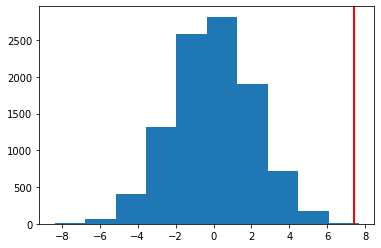

In [15]:
plt.hist(null_vals);
plt.axvline(samp_diff_means,color='r', linewidth=2);

So judging by the shaded region in Figure 9.11, it seems we would somewhat rarely observe changes in difference in mean 5.09 or more in a hypothesized universe of no gender discrimination. In other words, the  p-value is somewhat small. Hence, we would be inclined to reject this hypothesized universe, or using statistical language we would reject $H_{0}$.
 
What fraction of the null distribution is shaded? In other words, what is the exact value of the p-value?

In [20]:
#Calculate the P-value
p =  (null_vals > diff_means).mean()
p

0.0063

  
p-value is the probability of obtaining a test statistic just as or more extreme than the observed test statistic assuming the null hypothesis $H_{0}$ is true. each draw represents a possible difference in means for our null hypothesis. So where does the sample difference in mean falls in this distribution?

Keeping the definition of a p-value in mind, the probability of observing a difference in difference in means as large as 5 due to sampling variation alone in the null distribution is 0.027 = 2.7%. Since this p-value is smaller than our pre-specified significance level $\alpha = 0.05$, we reject the null hypothesis.

In other words, this p-value is sufficiently small to reject our hypothesized universe of no gender discrimination. We instead have enough evidence to change our mind in favor of gender discrimination being a likely culprit here. Observe that whether we reject the null hypothesis $H_{0}$ or not depends in large part on our choice of significance level $\alpha$

#### Simulating from confidence interval

To create the corresponding bootstrap distribution needed to construct a 95% confidence interval.

In [11]:
low,high = np.percentile(boot_mean, 2.5), np.percentile(boot_mean,97.5)
print(round(low,2),round(high,2))

3.22 11.64


we are 95% “confident” that the true difference in population $\mu_{m} - \mu_{f}$ is between (3.22, 11.64). Let’s visualize bootstrap_distribution and this percentile-based 95% confidence interval.

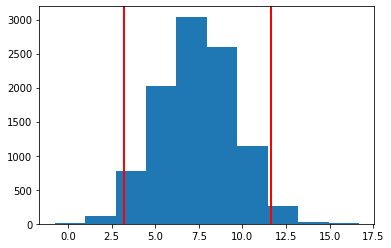

In [8]:
plt.hist(boot_mean);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

Notice a key value that is not included in the 95% confidence interval for  $\mu_{m}-\mu_{f}$: the value 0. In other words, a difference of 0 is not included in our net, suggesting that $\mu_{m}$ and $\mu_{f}$ are truly different! Furthermore, observe how the entirety of the 95% confidence interval for $\mu_{m}-\mu_{f}$ lies above 0, suggesting that this difference is in favor of men.
  
In the above case, our interval was entirely not equal to zero, which would suggest the null (the population mean is equal tozero) is actually false.

In [ ]:
This wi This risk of error is the price researchers pay for basing inference on a sample instead of performing a census on the entire population. But as we’ve seen in our numerous examples and activities so far, censuses are often very expensive and other times impossible, and thus researchers have no choice but to use a sample. Thus in any hypothesis test based on a sample, we have no choice but to tolerate some chance that a Type I error will be made and some chance that a Type II error will occur.

